In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(20)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


# Bar Charts

A basic bar chart of frequencies can be created through the use of seaborn's countplot function.

```seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)```

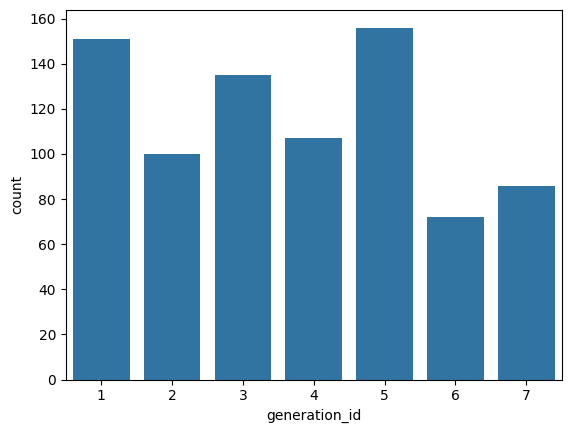

In [3]:
sb.countplot(data=pokemon, x='generation_id');

### Selecting color palette

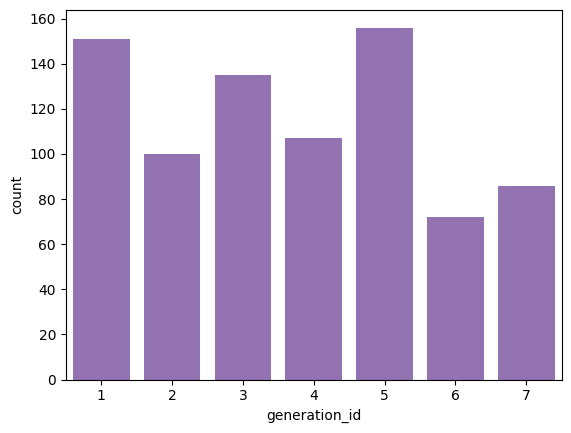

In [4]:
base_color = sb.color_palette()[4]

# Use the `color` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color);


### sorting it by order

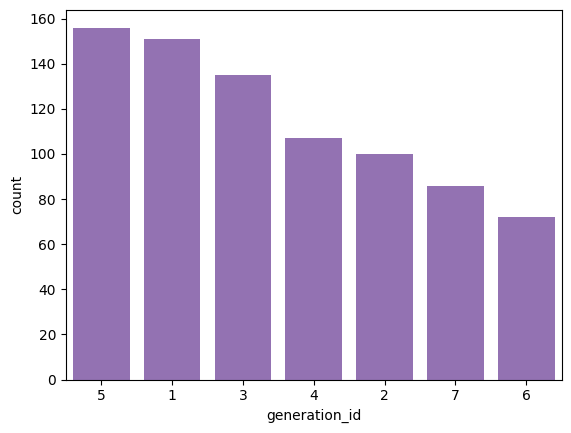

In [5]:

gen_order = pokemon['generation_id'].value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

### Turning the x lable to 90 using xticks 

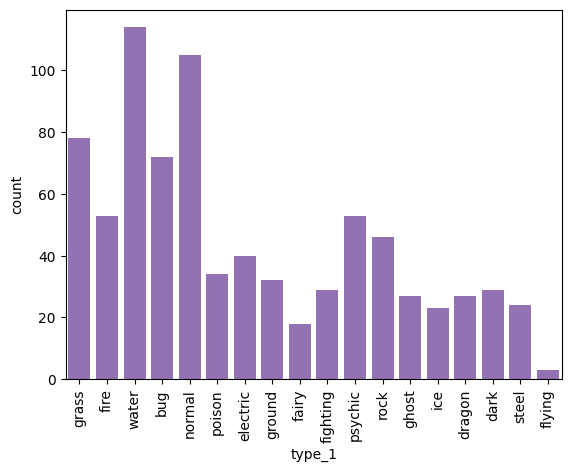

In [6]:

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90)

# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data=pokemon, x='type_1', color=base_color);

### making the horizontal plot by giving y parameter

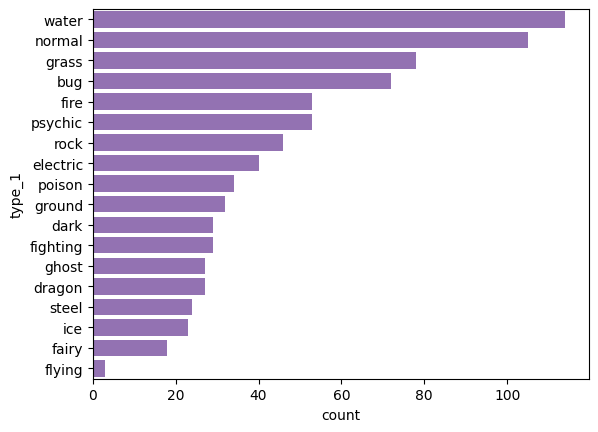

In [7]:
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

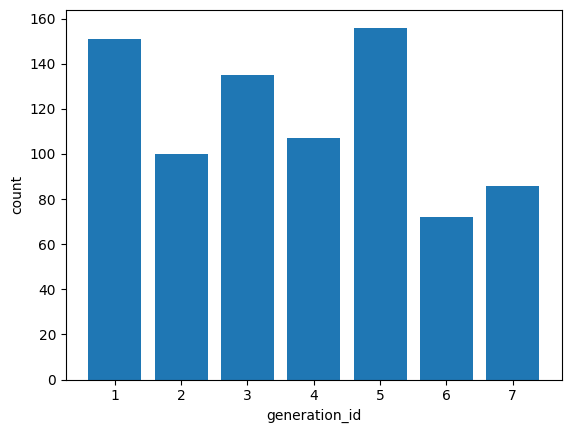

In [8]:
#matplotlib for the same bar chart

# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

In [9]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head(20)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


Text(0.5, 0, 'proportion')

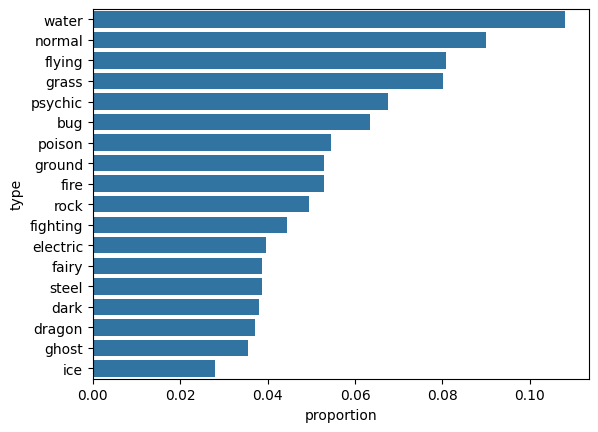

In [10]:
# get order of bars by frequency
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

    # Compute largest proportion
    # Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon

    # establish tick locations and create plot
base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')

In [11]:
# from matplotlib import rcParams
# # Specify the figure size in inches, for both X, and Y axes
# rcParams['figure.figsize'] = 12,4

# Histograms